In [8]:
import os 
print(os.getcwd())


/home/mili/Documentos/Famaf/tercer_año/redes/laboratorio/redes23lab3g01/src


In [9]:
ls


General.anf        Makefile*     out/         results/
Generator.cc*      network.ned*  Queue.cc*    Sink.cc*
lab3-kickstarter*  omnetpp.ini*  redes.ipynb


In [46]:
#Configuracion inicial
%matplotlib inline
import matplotlib.pyplot as plt #librería para graficas de python
import numpy # extiende las librerias de matemática de python
import pandas as pd #libreria para procesamiento de datos muy usada en la industria
import seaborn # Extiende las funcionalidades de matplotlib, muy usado en data visualization
import csv 

str_filename = 'results/exported_stads/1/bufferSize/0.1.csv'

data = pd.read_csv(str_filename)

data


,run,type,module,name,attrname,attrvalue,vectime,vecvalue
0,General-0-20230509-10:39:22-114504,runattr,NaN,NaN,configname,General,NaN,NaN
1,General-0-20230509-10:39:22-114504,runattr,NaN,NaN,datetime,20230509-10:39:22,NaN,NaN
2,General-0-20230509-10:39:22-114504,runattr,NaN,NaN,datetimef,20230509-103922,NaN,NaN
3,General-0-20230509-10:39:22-114504,runattr,NaN,NaN,experiment,General,NaN,NaN
4,General-0-20230509-10:39:22-114504,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,NaN
5,General-0-20230509-10:39:22-114504,runattr,NaN,NaN,iterationvars,NaN,NaN,NaN
6,General-0-20230509-10:39:22-114504,runattr,NaN,NaN,iterationvarsd,NaN,NaN,NaN
7,General-0-20230509-10:39:22-114504,runattr,NaN,NaN,iterationvarsf,NaN,NaN,NaN
8,General-0-20230509-10:39:22-114504,runattr,NaN,NaN,measurement,NaN,NaN,NaN
9,General-0-20230509-10:39:22-114504,runattr,NaN,NaN,network,Network,NaN,NaN


In [47]:
#Omnet guarda los valores de nuestro "vector" (lista de valores) en una celda, por lo que tengo que extraer estos valores

time_gen = data['vectime'].loc[[26]].tolist()
buffer_gen = data['vecvalue'].loc[[26]].tolist()

time_queue = data['vectime'].loc[[27]].tolist()
buffer_queue = data['vecvalue'].loc[[27]].tolist()

time_sink = data['vectime'].loc[[28]].tolist()
buffer_sink = data['vecvalue'].loc[[28]].tolist()

# Los valores que sacamos estan como un solostring separados por comas por lo que tengo que convertirlos a listas para poder graficarlos
time_gen = list(map(float,time_gen[0].split()))
time_queue = list(map(float,time_queue[0].split()))
time_sink = list(map(float,time_sink[0].split()))
buffer_gen = list(map(float,buffer_gen[0].split()))
buffer_queue = list(map(float,buffer_queue[0].split()))
buffer_sink = list(map(float,buffer_sink[0].split()))

print(len(time_gen))
print(len(buffer_gen))
print(len(time_queue))
print(len(buffer_queue))
print(len(time_sink))
print(len(buffer_sink))

1979
1979
1970
1970
1199
1199


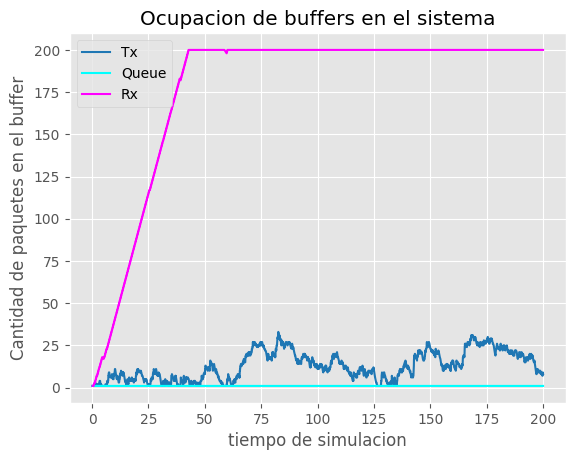

In [48]:
fig, ax1 = plt.subplots()
plt.plot(time_gen,buffer_gen, color='tab:blue', label="Tx")
plt.plot(time_queue,buffer_queue, color='cyan', label="Queue")
plt.plot(time_sink,buffer_sink, color='magenta', label="Rx")
plt.title('Ocupacion de buffers en el sistema')
plt.xlabel("tiempo de simulacion")
plt.ylabel("Cantidad de paquetes en el buffer")
plt.legend()
plt.show()


In [13]:
cargaRecibida =[998,976,655,324,200]
packetGenList = []

for file_name in ["0.1.csv", "0.2.csv", "0.3.csv", "0.6.csv", "1.csv"]:
    file_name = 'results/exported_stads/1/' + file_name
    fh = open(file_name)
    data = pd.read_csv(file_name)
    packetGen = data['vecvalue'].loc[[26]].tolist()
    packetGen = list(map(float,packetGen[0].split()))
    value = len(packetGen)
    # append the value to the list
    packetGenList.append(value)
    fh.close() # close the file object when done

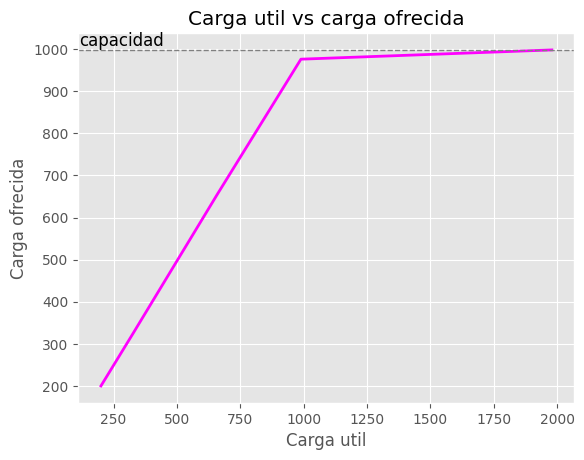

In [10]:
fig, ax = plt.subplots()
plt.style.use("ggplot")

# plot the data
ax.plot(packetGenList, cargaRecibida, color='magenta', linewidth=2)

# Find the maximum value of cargaRecibida
max_carga_recibida = max(cargaRecibida)

# Add a horizontal line at max_carga_recibida
ax.axhline(y=max_carga_recibida, color='grey', linestyle='--',linewidth=1)

# Add the text 'capacidad' at the location of the horizontal line
ax.text(x=280, y=max_carga_recibida+0.1, s='capacidad', ha='center', va='bottom', fontsize=12)

# set the plot title and labels
plt.title('Carga util vs carga ofrecida')
plt.xlabel("Carga util")
plt.ylabel("Carga ofrecida")

plt.show()

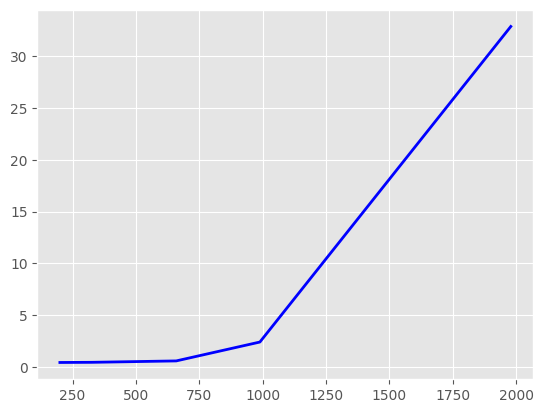

In [11]:
delay = [32.879469,2.398693,0.575730,0.439918,0.424711]

fig, ax = plt.subplots() #creo una figura y divido en pares para dibujar
ax.plot(packetGenList,delay, color='blue', linewidth=2)

plt.show()